this notebook is pretty much the same as v1 but I'm reducing the number of observations in the positive class

In [1]:
#imports
from fastai.vision.all  import *
from pathlib import Path
import pandas as pd

# data

In [2]:
!ls ../../../data/kickoffs

kickoff_returns_v1		kickoff_returns_v2_frame_sub60
kickoff_returns_v2_frame_sub10	kickoff_returns_v2_frame_sub70
kickoff_returns_v2_frame_sub20	kickoff_returns_v2_frame_sub80
kickoff_returns_v2_frame_sub30	kickoff_returns_v2_frame_sub90
kickoff_returns_v2_frame_sub40	plays.csv
kickoff_returns_v2_frame_sub50	v1


In [3]:
# import cv2
# im = cv2.imread('kickoffs/v1/2018090900_1992.png')
# print('width: ', im.shape[1])
# print('height:', im.shape[0])

In [4]:
data_path = '../../../data/kickoffs/'
plays = pd.read_csv(data_path + 'plays.csv'); plays.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,"J.Elliott kicks 65 yards from PHI 35 to end zone, Touchback.",1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


In [9]:
df = plays.query('specialTeamsPlayType == "Kickoff" & specialTeamsResult == "Return"')[['gameId', 'playId', 'playResult']]
df['fname'] = df.apply(lambda row: str(row.gameId) + '_' + str(row.playId) + '.png', axis=1)
df['label'] = df.apply(lambda row: 1 if int(row.playResult) < 30 else 0 , axis=1)
df.head(3)

,gameId,playId,playResult,fname,label
3,2018090600,677,34,2018090600_677.png,0
9,2018090600,1606,60,2018090600_1606.png,0
24,2018090900,36,45,2018090900_36.png,0


In [10]:
df2 = df[['fname', 'label']]; df2.head(3)

,fname,label
3,2018090600_677.png,0
9,2018090600_1606.png,0
24,2018090900_36.png,0


In [11]:
sum(df2['label'])

405

In [12]:
len(df2)

2921

In [13]:
p = Path(data_path)
dls_sub10 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub10'), bs=32)
dls_sub20 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub20'), bs=32)
dls_sub30 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub30'), bs=32)
dls_sub40 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub40'), bs=32)
dls_sub50 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub50'), bs=32)
dls_sub60 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub60'), bs=32)
dls_sub70 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub70'), bs=32)
dls_sub80 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub80'), bs=32)
dls_sub90 = ImageDataLoaders.from_df(df=df2, path=Path(data_path+'kickoff_returns_v2_frame_sub90'), bs=32)

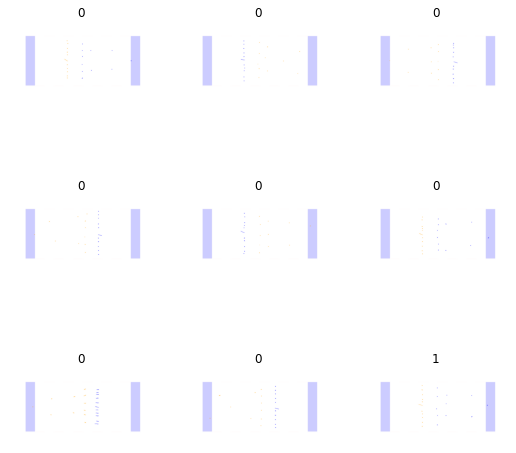

In [14]:
dls_sub10.show_batch()

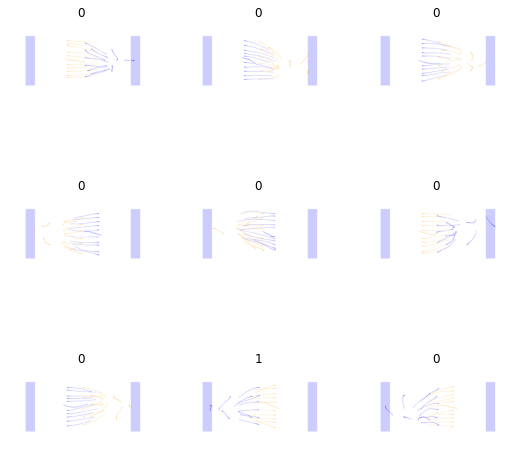

In [15]:
dls_sub50.show_batch()

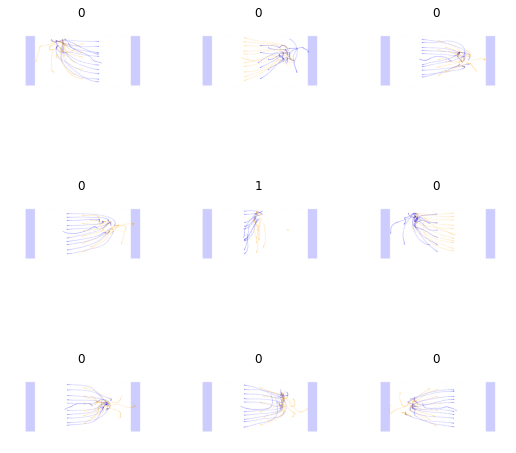

In [16]:
dls_sub90.show_batch()

# modeling - 10 frames

SuggestedLRs(valley=0.0012022644514217973)

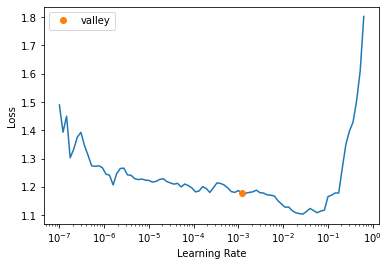

In [17]:
learn = cnn_learner(dls_sub10, resnet34, metrics=error_rate); learn.lr_find()

In [18]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

In [19]:
# SuggestedLRs(*lrs)
#https://github.com/fastai/fastai/blob/master/fastai/callback/schedule.py#L284

In [20]:
learn.fine_tune(6, 0.0014454397605732083)

epoch,train_loss,valid_loss,error_rate,time
0,0.963473,1.188074,0.510274,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.659791,3.664407,0.864726,01:01
1,0.592718,1.049868,0.130137,01:00
2,0.488879,0.434522,0.143836,01:01
3,0.405658,1.869011,0.746575,01:01
4,0.317933,0.364628,0.102740,01:00
5,0.243702,0.379647,0.102740,01:01


In [21]:
learn.fine_tune(6, 0.0014454397605732083)

epoch,train_loss,valid_loss,error_rate,time
0,0.233421,0.501047,0.133562,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.275889,0.832287,0.123288,01:00
1,0.339590,0.946745,0.359589,01:00
2,0.336959,6.720637,0.863014,01:00
3,0.248282,0.541184,0.111301,01:00
4,0.140473,0.518701,0.128425,01:01
5,0.077113,0.511131,0.123288,01:00


# modeling - 20 frames

SuggestedLRs(valley=1.4454397387453355e-05)

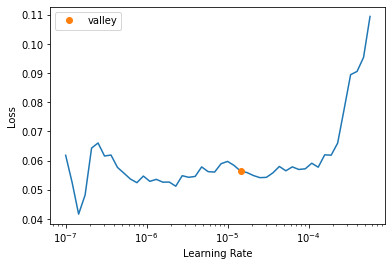

In [22]:
learn2 = cnn_learner(dls_sub20, resnet34, metrics=error_rate); learn.lr_find()

In [23]:
learn2.fine_tune(6, 0.0000999999974)

epoch,train_loss,valid_loss,error_rate,time
0,1.154117,0.757036,0.392123,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.116889,0.839903,0.438356,01:01
1,0.993660,0.883741,0.450342,01:01
2,0.914041,1.210495,0.635274,01:00
3,0.841262,0.676133,0.347603,01:01
4,0.815281,0.756132,0.393836,01:00
5,0.790506,0.693295,0.339041,01:00


In [24]:
learn2.fine_tune(6, 0.0000999999974)

epoch,train_loss,valid_loss,error_rate,time
0,0.785421,0.679698,0.321918,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.735826,0.906430,0.470890,01:01
1,0.708507,0.407390,0.119863,01:01
2,0.640293,1.460602,0.726027,01:00
3,0.615823,0.738219,0.363014,01:01
4,0.574872,0.493436,0.202055,01:00
5,0.533097,0.517816,0.227740,01:01


# modeling - 30 frames

SuggestedLRs(valley=2.0892961401841603e-05)

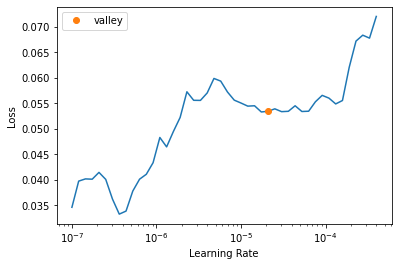

In [25]:
learn3 = cnn_learner(dls_sub30, resnet34, metrics=error_rate); learn.lr_find()

In [26]:
learn3.fine_tune(6, 0.00003630780702224)

epoch,train_loss,valid_loss,error_rate,time
0,1.253409,0.656187,0.332192,00:47


epoch,train_loss,valid_loss,error_rate,time
0,1.145851,0.883727,0.472603,01:01
1,1.104548,0.792755,0.410959,01:01
2,1.012286,0.803951,0.412671,01:01
3,0.986214,0.617818,0.291096,01:00
4,0.947879,0.676883,0.325342,01:01
5,0.942121,0.682389,0.337329,01:01


In [27]:
learn3.fine_tune(6, 0.00003630780702224)

epoch,train_loss,valid_loss,error_rate,time
0,0.940795,0.672050,0.320205,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.910976,0.637418,0.289384,01:01
1,0.923007,0.719650,0.345890,01:01
2,0.854965,0.567139,0.227740,01:00
3,0.823688,0.675562,0.327055,01:01
4,0.829875,0.577709,0.238014,01:00
5,0.800726,0.549764,0.227740,01:01


# modeling - 40 frames

SuggestedLRs(valley=9.999999747378752e-06)

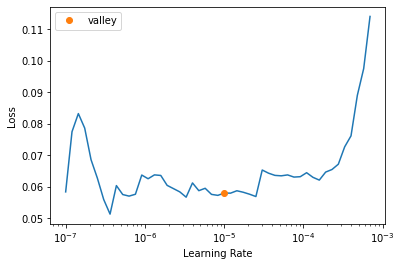

In [28]:
learn4 = cnn_learner(dls_sub40, resnet34, metrics=error_rate); learn.lr_find()

In [29]:
learn4.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,1.268088,0.878383,0.469178,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.172266,0.811884,0.424658,01:01
1,1.135839,0.731824,0.359589,01:00
2,1.056174,0.701548,0.330479,01:01
3,1.021646,0.659895,0.308219,01:01
4,0.984894,0.689461,0.335616,01:01
5,1.028720,0.696124,0.333904,01:00


In [30]:
learn4.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,0.961187,0.648299,0.292808,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.910515,0.750029,0.366438,01:01
1,0.903342,0.631020,0.284247,01:01
2,0.890458,0.569386,0.224315,01:00
3,0.822366,0.628933,0.272260,01:00
4,0.806847,0.613279,0.260274,01:01
5,0.804415,0.616547,0.270548,01:01


# modeling - 50 frames

SuggestedLRs(valley=3.311311274956097e-06)

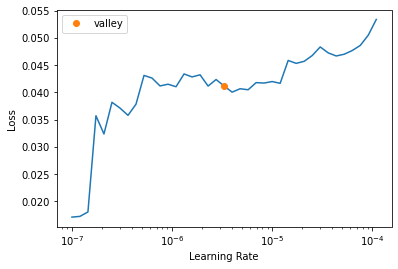

In [31]:
learn5 = cnn_learner(dls_sub50, resnet34, metrics=error_rate); learn.lr_find()

In [32]:
learn5.fine_tune(6, 0.00005248074739938602)

epoch,train_loss,valid_loss,error_rate,time
0,1.222282,0.760016,0.386986,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.089675,0.797555,0.421233,01:01
1,1.001082,0.817133,0.414384,01:01
2,0.913349,0.634050,0.299658,01:00
3,0.867214,0.625624,0.292808,01:01
4,0.823344,0.630251,0.299658,01:00
5,0.807562,0.623775,0.301370,01:01


In [33]:
learn5.fine_tune(6, 0.00005248074739938602)

epoch,train_loss,valid_loss,error_rate,time
0,0.796291,0.616747,0.282534,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.779658,0.654201,0.294521,01:01
1,0.764024,0.583884,0.263699,01:00
2,0.692742,0.551721,0.222603,01:01
3,0.674622,0.579047,0.229452,01:01
4,0.662763,0.523941,0.205479,01:01
5,0.631539,0.538207,0.212329,01:00


# modeling - 60 frames

SuggestedLRs(valley=1.9054607491852948e-06)

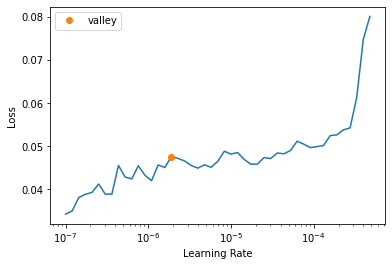

In [34]:
learn6 = cnn_learner(dls_sub60, resnet34, metrics=error_rate); learn.lr_find()

In [35]:
learn6.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,1.273336,0.895510,0.470890,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.180170,0.880754,0.460616,01:01
1,1.127897,0.829502,0.441781,01:01
2,1.034654,0.745736,0.376712,01:01
3,1.001476,0.755988,0.364726,01:01
4,1.001434,0.767628,0.392123,01:01
5,0.985035,0.696808,0.349315,01:00


In [36]:
learn6.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,0.980705,0.722162,0.328767,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.903729,0.736891,0.363014,01:00
1,0.906720,0.739272,0.368151,01:01
2,0.891840,0.731703,0.344178,01:00
3,0.836044,0.682835,0.323630,01:01
4,0.801952,0.630126,0.297945,01:01
5,0.812025,0.650111,0.309932,01:01


# modeling - 70 frames

SuggestedLRs(valley=2.0892961401841603e-05)

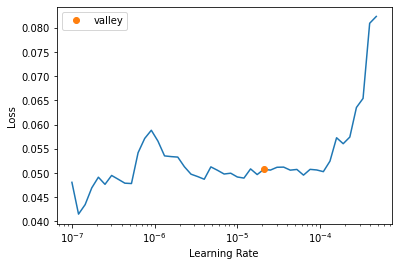

In [37]:
learn7 = cnn_learner(dls_sub70, resnet34, metrics=error_rate); learn.lr_find()

In [38]:
learn7.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,1.285117,0.899843,0.474315,00:47


epoch,train_loss,valid_loss,error_rate,time
0,1.203161,0.802863,0.428082,01:00
1,1.125839,0.764824,0.416096,01:01
2,1.079708,0.741286,0.361301,01:01
3,0.976192,0.749408,0.364726,01:01
4,0.966182,0.693802,0.321918,01:01
5,0.929705,0.708417,0.327055,01:00


In [39]:
learn7.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,0.914898,0.665803,0.306507,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.864251,0.717863,0.327055,01:01
1,0.873278,0.694858,0.306507,01:01
2,0.872758,0.659881,0.292808,01:00
3,0.814597,0.683634,0.309932,01:01
4,0.785017,0.634904,0.273973,01:01
5,0.762985,0.706999,0.306507,01:01


# modeling - 80 frames

SuggestedLRs(valley=2.75422871709452e-06)

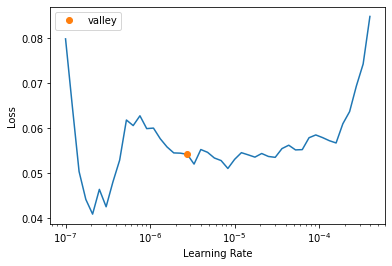

In [40]:
learn8 = cnn_learner(dls_sub80, resnet34, metrics=error_rate); learn.lr_find()

In [41]:
learn8.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,1.319329,0.954707,0.527397,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.216001,0.989629,0.541096,01:01
1,1.109878,0.881088,0.484589,01:01
2,1.068026,0.888151,0.482877,01:01
3,1.056047,0.777228,0.422945,01:00
4,0.992468,0.781192,0.434932,01:00
5,0.934618,0.751333,0.400685,01:01


In [42]:
learn8.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,0.985671,0.746323,0.404110,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.926405,0.693488,0.381849,01:01
1,0.905131,0.704290,0.383562,01:01
2,0.867283,0.641527,0.345890,01:01
3,0.855405,0.640938,0.356164,01:01
4,0.856886,0.642396,0.351027,01:00
5,0.827123,0.610417,0.332192,01:01


In [43]:
learn8.fine_tune(6, 0.000030199516913853586)

epoch,train_loss,valid_loss,error_rate,time
0,0.834779,0.660225,0.369863,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.831614,0.608404,0.328767,01:01
1,0.825606,0.539618,0.263699,01:01
2,0.809425,0.584807,0.306507,01:01
3,0.712876,0.554476,0.282534,01:01
4,0.700976,0.584087,0.308219,01:01
5,0.743755,0.573961,0.285959,01:01


# modeling - 90 frames

SuggestedLRs(valley=1.737800812406931e-05)

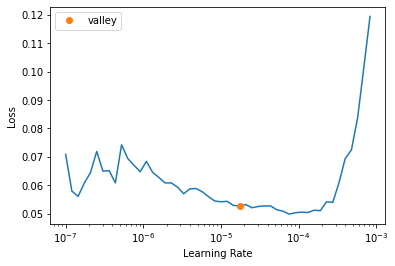

In [44]:
learn9 = cnn_learner(dls_sub90, resnet34, metrics=error_rate); learn.lr_find()

In [45]:
learn9.fine_tune(6, 0.000020892961401841603)

epoch,train_loss,valid_loss,error_rate,time
0,1.287325,0.919380,0.513699,00:48


epoch,train_loss,valid_loss,error_rate,time
0,1.186211,0.806766,0.445205,01:01
1,1.126137,0.825532,0.445205,01:01
2,1.096741,0.772816,0.431507,01:01
3,1.048384,0.823622,0.438356,01:01
4,1.024053,0.767851,0.409247,01:01
5,1.049960,0.756975,0.412671,01:01


In [46]:
learn9.fine_tune(6, 0.000020892961401841603)

epoch,train_loss,valid_loss,error_rate,time
0,1.012552,0.738901,0.395548,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.953615,0.782792,0.412671,01:01
1,0.972201,0.692761,0.385274,01:01
2,0.934106,0.749215,0.412671,01:01
3,0.929433,0.743869,0.412671,01:01
4,0.903715,0.711575,0.375000,01:01
5,0.883194,0.645973,0.325342,01:01


In [47]:
learn9.fine_tune(6, 0.000020892961401841603)

epoch,train_loss,valid_loss,error_rate,time
0,0.868483,0.683364,0.351027,00:48


epoch,train_loss,valid_loss,error_rate,time
0,0.906678,0.673524,0.347603,01:01
1,0.876750,0.621890,0.297945,01:01
2,0.856157,0.687225,0.361301,01:01
3,0.853455,0.683248,0.349315,01:01
4,0.838980,0.724062,0.369863,01:01
5,0.846630,0.628356,0.309932,01:00
